https://its.cern.ch/jira/browse/ATLASMINER-35

For a given RSE, show the size vs. age distribution.

In [1]:
%matplotlib inline
import matplotlib
matplotlib.rc('font', **{'size': 22})

In [2]:
rse = 'WUPPERTALPROD_DATADISK'

In [3]:
import ssl
import urllib.request

r = urllib.request.urlopen('https://rucio-hadoop.cern.ch/datasets_per_rse?rse={0}'.format(rse), context=ssl._create_unverified_context()).read().decode('utf-8')

In [4]:
import datetime

now = datetime.datetime.now()
sizes = []
created = []
accessed = []

for line in r.split('\n'):
    l = line.split('\t')
    try:
        cdate = (now - datetime.datetime.strptime(l[4],'%Y-%m-%dT%H:%M:%S.%fZ')).days
    except IndexError:
        continue
    try:
        (size, create) = (int(l[3])*1e-12, cdate)
    except:
        continue
    try:
        adate = (now - datetime.datetime.strptime(l[6],'%Y-%m-%dT%H:%M:%S.%fZ')).days
        access = adate
    except:
        access = 2000                                                                                                                                                   
    sizes.append(size)                                                                                                                                                  
    created.append(create)
    accessed.append(access)

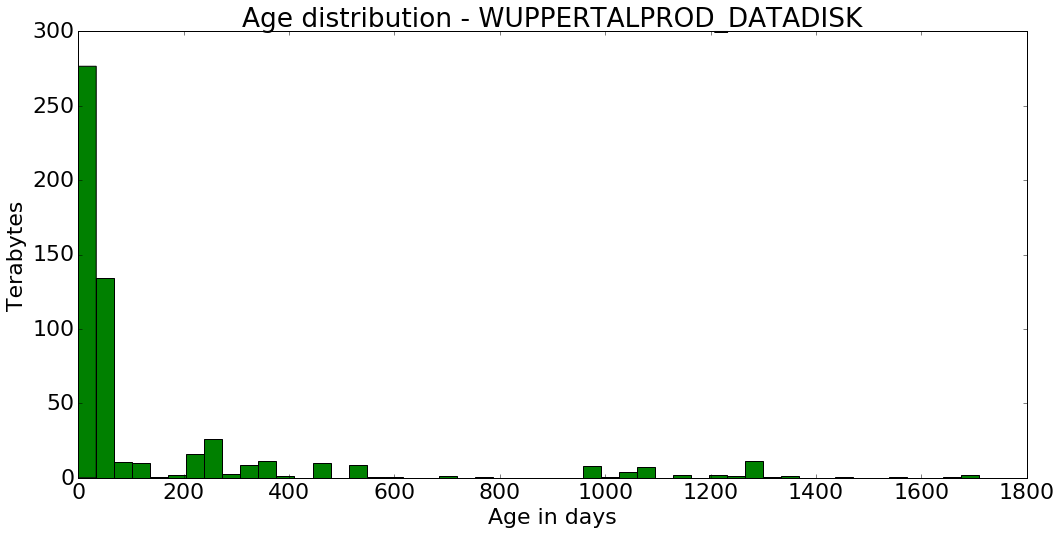

In [5]:
import matplotlib.pyplot as plt

n, bins, patches = plt.hist(created, 50, weights=sizes, facecolor='green')

plt.xlabel('Age in days')
plt.ylabel('Terabytes')
plt.title('Age distribution - %s' % rse)

fig = plt.gcf()
fig.set_size_inches(17, 8)